In [5]:
import pandas as pd
import numpy as np


In [22]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv', low_memory=False)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [23]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [15]:
!pip install imblearn

In [25]:
#dropping stab column
df.drop('stab', axis = 1, inplace = True)

In [26]:
#checking the distribution of the target variable which in this case is stabf
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [27]:
#checking for null values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [28]:
#checking the distribution of the target variable which in this case is stabf after dropping the stab column
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [29]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [31]:
#using the scikit-learn utils function to shuffle the target variable
import sklearn.utils
df = sklearn.utils.shuffle(df)
df = df.reset_index(drop=True)
df.shape
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [32]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

In [34]:
#more preprocessing

X = df.drop(columns='stabf')

y = df['stabf']

In [36]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

y_train.value_counts()

unstable    5118
stable      2882
Name: stabf, dtype: int64

In [47]:
# Transform dataset using scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)                
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 

In [39]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)
#value count our y_balanced to cross check the effect of smote on the dataset
y_balanced.value_counts()

stable      5118
unstable    5118
Name: stabf, dtype: int64

In [41]:
#Encoding the categorical feature. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.stabf = encoder.fit_transform(df.stabf)
#let's preview the encoded feature
df.stabf


0       1
1       1
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: stabf, Length: 10000, dtype: int32

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[ 1.17801181,  0.95418769, -1.58476152, ..., -1.56935076,
         1.26124781,  0.95786273],
       [ 1.28746521,  0.4422302 , -0.00668349, ..., -0.19508217,
        -0.22017191, -0.74782156],
       [ 0.12869414,  0.72345933,  0.81269663, ..., -1.57514776,
         0.6462103 ,  1.01011788],
       ...,
       [ 1.33263188,  1.4495317 ,  1.19072913, ...,  1.0734812 ,
        -1.4346709 ,  0.94167634],
       [-1.38583423, -0.57421612,  0.09373221, ..., -1.18706982,
         0.98883293, -1.7179948 ],
       [ 1.50226616,  1.43139031,  0.60616094, ..., -0.05019256,
        -1.29334648,  1.573509  ]])

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet, BayesianRidge

RCF_algo = RandomForestClassifier()
for i in range(8):
    model_rcf     = RCF_algo.fit(x_train, y_train)
    ratings = model_rcf.score(x_test, y_test)
    print(i, ratings)


0 0.9205
1 0.9185
2 0.9145
3 0.9195
4 0.917
5 0.921
6 0.924
7 0.9195


In [53]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.92


In [61]:
!pip install xgboost

In [67]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9435

In [70]:
! pip install lightGBM

In [78]:
from lightgbm import LGBMClassifier
model = ltb.LGBMRegressor()
model.fit(x_train, y_train)

# make predictions
predicted_y = model.predict(x_test)

# evaluate predictions
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy


ValueError: could not convert string to float: 'stable'

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

model_param = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features}
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_param, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


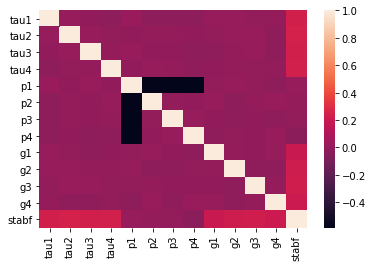

In [63]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [82]:
import matplotlib.pyplot as plt
x = x_train
plt.bar(x.column, importance)
plt.xlabels('labels')
plt.ylabel('importance')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'column'